<a href="https://colab.research.google.com/github/YunhwanJacobLee/AIFFEL_quest_cr/blob/main/Project/Project_03_01(Image_Classification%5BVGG_16%5D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

data_dir = '/content/gdrive/My Drive/Colab Notebooks/AIFFEL/AIFEEL_cr/CV/cats_and_dogs_filtered/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_dir = data_dir + 'train'
validation_dir = data_dir + 'validation'
print(train_dir)
print(validation_dir)

/content/gdrive/My Drive/Colab Notebooks/AIFFEL/AIFEEL_cr/CV/cats_and_dogs_filtered/train
/content/gdrive/My Drive/Colab Notebooks/AIFFEL/AIFEEL_cr/CV/cats_and_dogs_filtered/validation


In [ ]:
# directory with our training cat pictures
train_cats_dir = data_dir + 'train/cats/'
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = data_dir + 'train/dogs/'
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = data_dir + 'validation/cats/'
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = data_dir + 'validation/cats/'
print(validation_dogs_dir)

/content/gdrive/My Drive/Colab Notebooks/AIFFEL/AIFEEL_cr/CV/cats_and_dogs_filtered/train/cats/
/content/gdrive/My Drive/Colab Notebooks/AIFFEL/AIFEEL_cr/CV/cats_and_dogs_filtered/train/dogs/
/content/gdrive/My Drive/Colab Notebooks/AIFFEL/AIFEEL_cr/CV/cats_and_dogs_filtered/validation/cats/
/content/gdrive/My Drive/Colab Notebooks/AIFFEL/AIFEEL_cr/CV/cats_and_dogs_filtered/validation/cats/


In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [ ]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [ ]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
print(train_data_gen[0][0].shape) # 16 batch, 256 x 256, channel 3
print(train_data_gen[0][1].shape) # 16 batch 1D 벡터

(16, 256, 256, 3)
(16,)


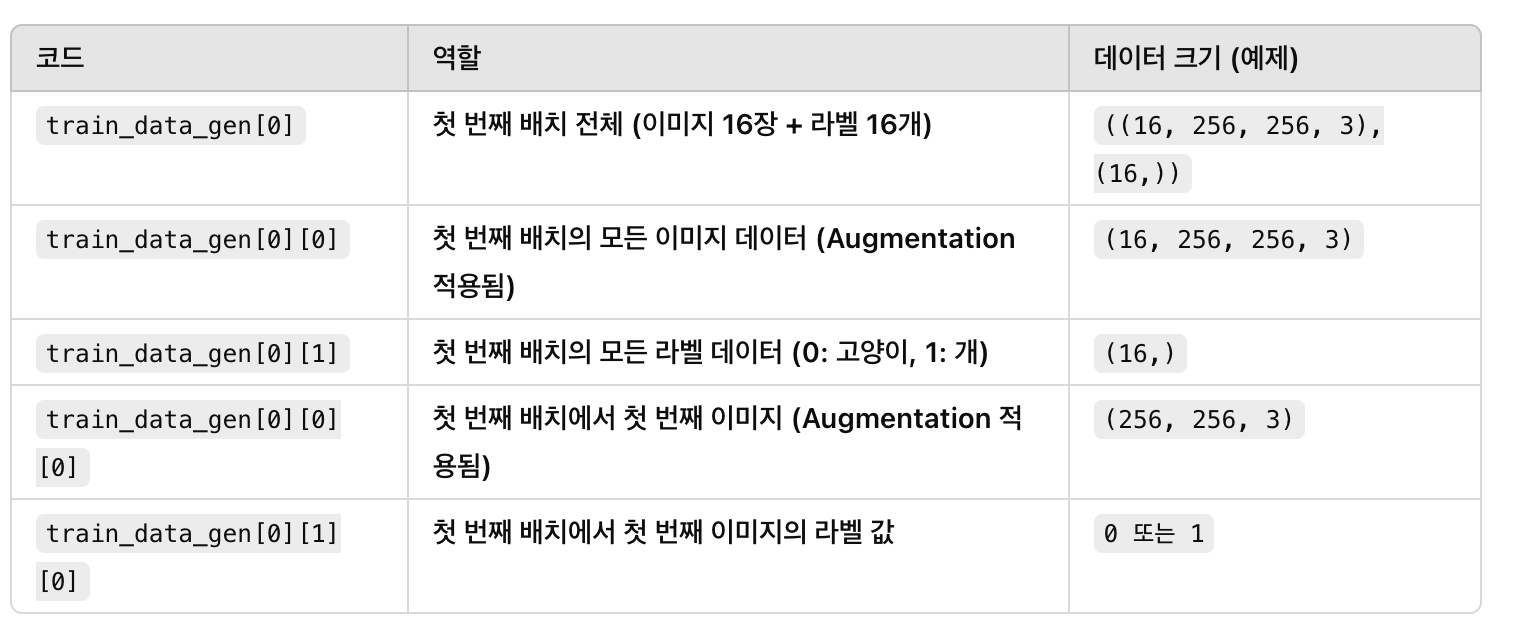

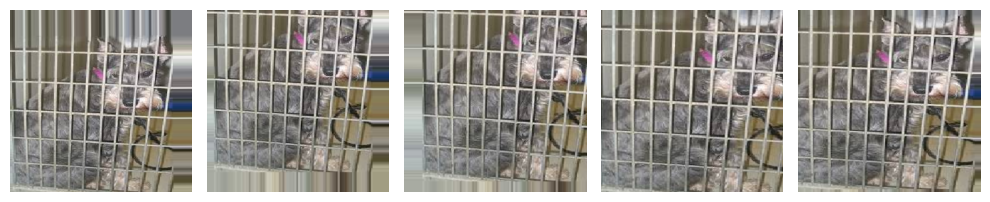

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# Validation data generator
# Validation 데이터에도 train 데이터와 같은 동일한 작업을 해 줍니다.
# 그러나 Validation 데이터는 classification이 잘 되는지 평가하는 용도로 사용되기 때문에 데이터의 스케일만 변경해 줍니다.
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


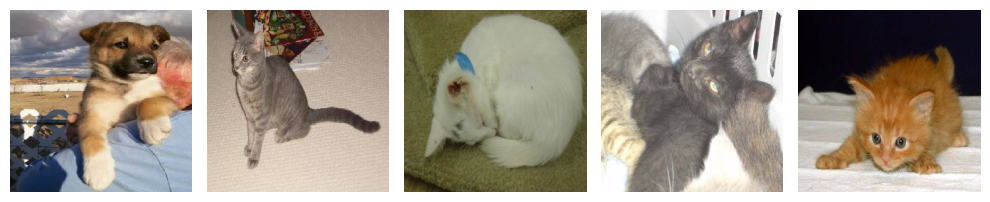

In [ ]:
# Validation 데이터를 확인해 봅시다. 크게 이미지와 정답 데이터로 구성이 되어 있습니다.
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [ ]:
_[:5] # 정답 데이터

array([1., 0., 0., 0., 0.], dtype=float32)

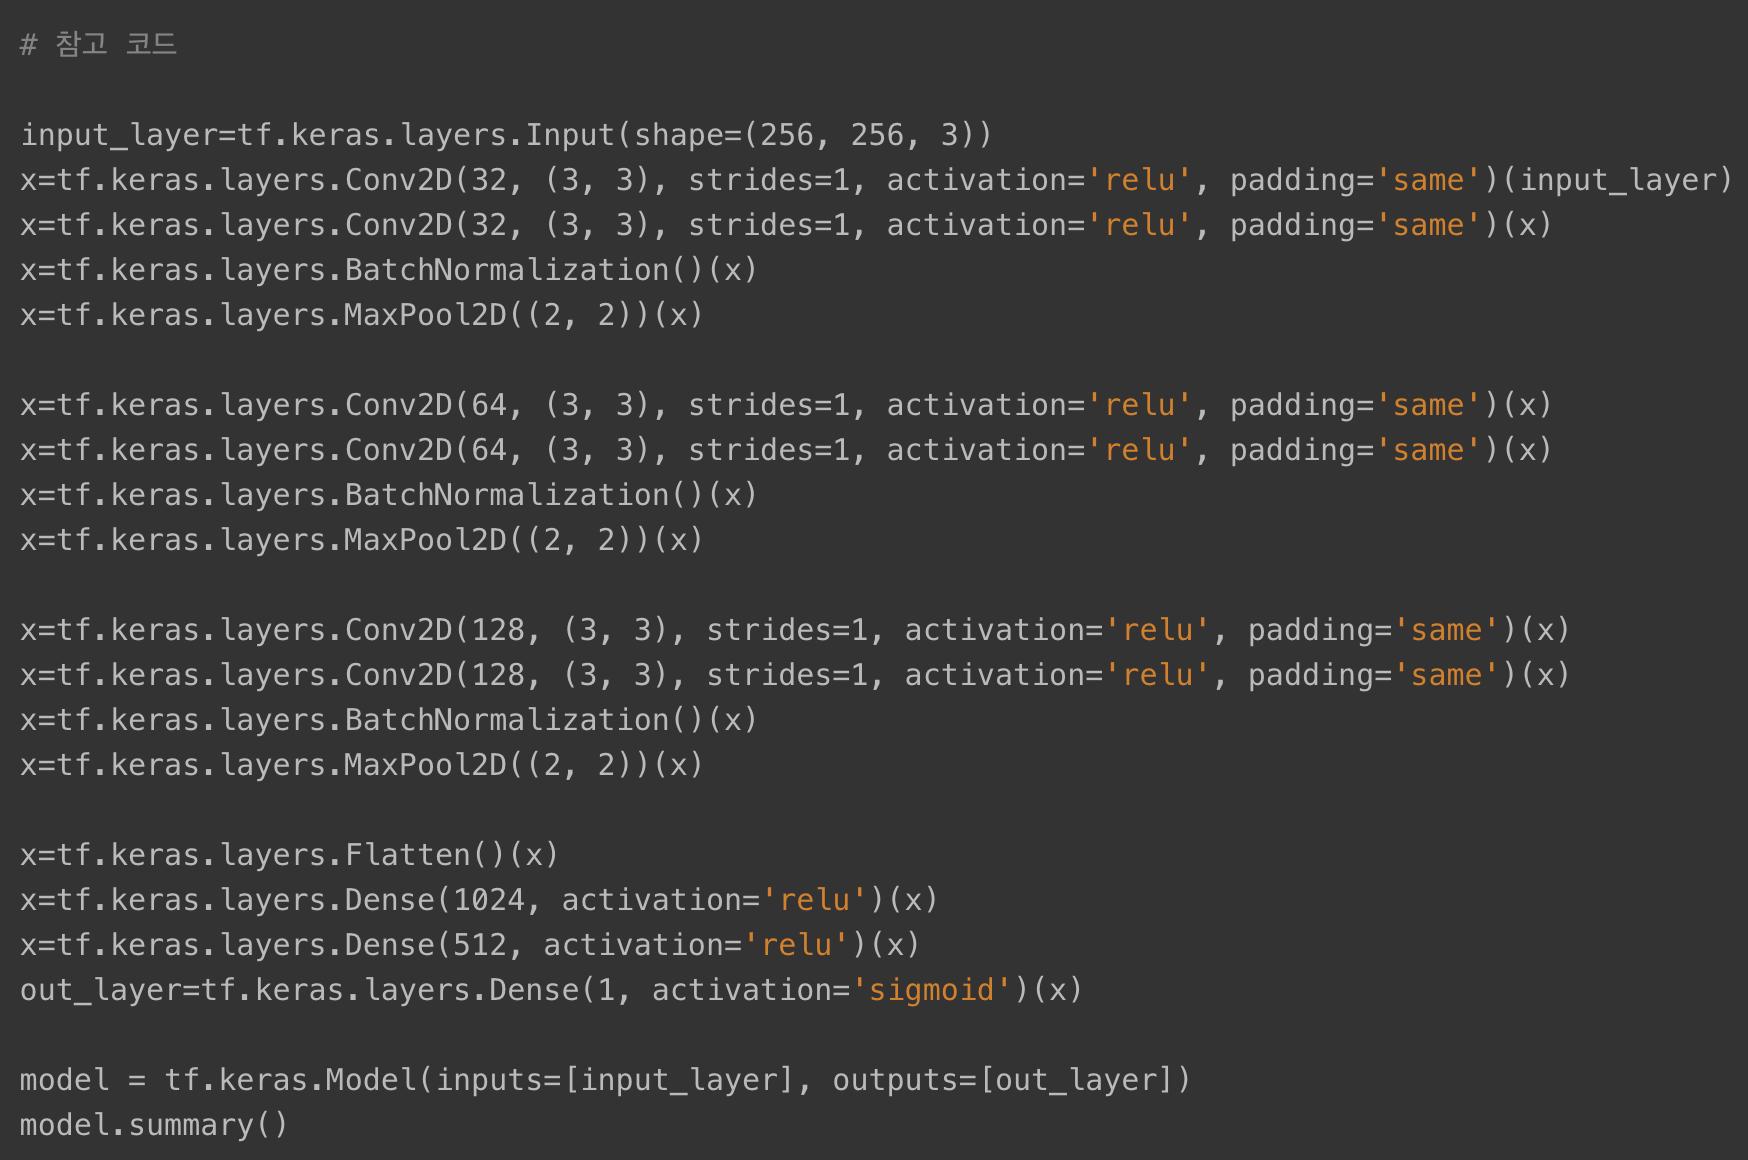

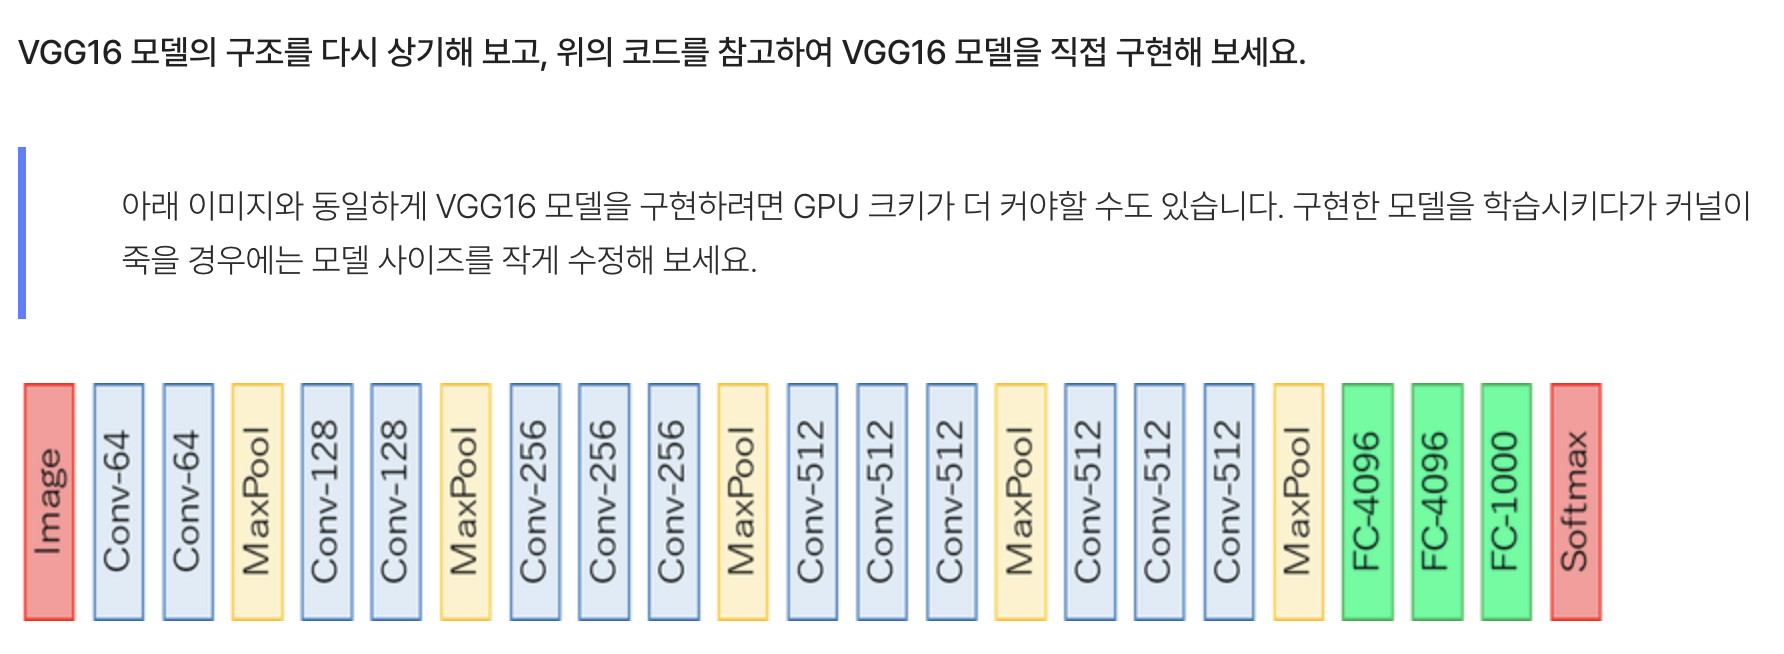

In [ ]:
input_layer = tf.keras.layers.Input(shape=(256, 256, 3))
x = tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     134,221,824 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 169,815,825 (647.80 MB)

 Trainable params: 169,815,825 (647.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 손실함수, optimizer, metric을 설정해 줍니다.
# 손실함수와 metric은 분류 task에 따라 다양하게 바꿀 수 있습니다. optimizer도 Adam 외에 다양한 것을 사용할 수 있습니다. 자유롭게 바꿔보세요.
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [ ]:
history = model.fit(
      train_data_gen,
      steps_per_epoch = int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) / batch_size),
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


125/125 ━━━━━━━━━━━━━━━━━━━━ 757s 6s/step - binary_accuracy: 0.4959 - loss: 14019464.0000 - val_binary_accuracy: 0.5000 - val_loss: 0.8162
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 57s 454ms/step - binary_accuracy: 0.4968 - loss: 0.7319 - val_binary_accuracy: 0.5000 - val_loss: 0.6950
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 458ms/step - binary_accuracy: 0.4881 - loss: 0.7014 - val_binary_accuracy: 0.5000 - val_loss: 0.6958
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 58s 461ms/step - binary_accuracy: 0.4823 - loss: 0.7124 - val_binary_accuracy: 0.5000 - val_loss: 0.6980
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 58s 461ms/step - binary_accuracy: 0.5084 - loss: 0.7009 - val_binary_accuracy: 0.5000 - val_loss: 0.7006


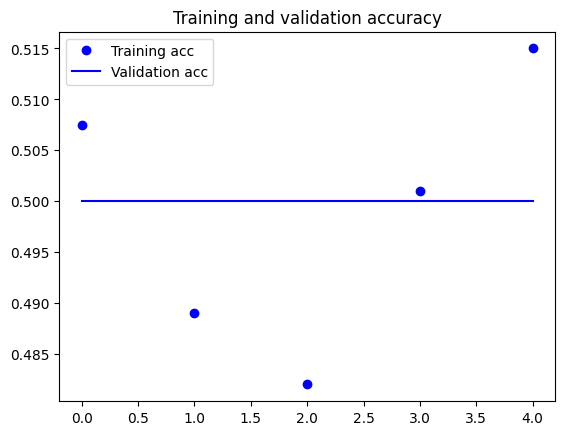

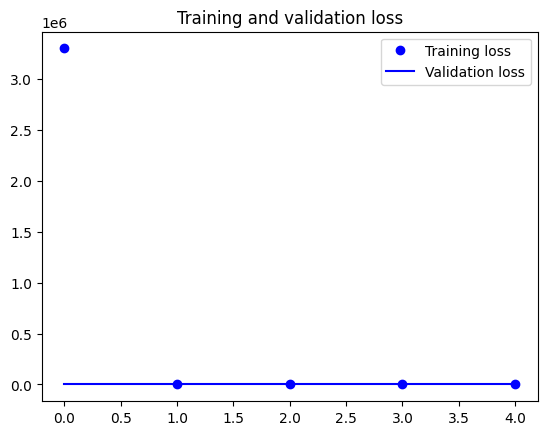

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()